In [1]:
import re
import sys
import json
import csv
from xml.sax.saxutils import escape
import networkx as nx
from itertools import combinations
import time
from matplotlib import pyplot as plt
from operator import itemgetter


def parsecsv():
    with open('ARCSLiterature.csv', 'r') as thefile:
        data = csv.DictReader(thefile, delimiter=',', quotechar='"')
        datadict = {}
        for row in data:
            if escape(row['Title']) not in datadict:
                datadict[row['Title']] = [row['Author'],
                                                 row['Publication Year'],
                                                 row['Publication Title'],
                                                 row['Issue'],
                                                 row['Volume'],
                                                 row['DOI'],
                                                 row['Abstract Note'],
                                                 row['Manual Tags']
                                          ]

            else:
                continue
        return datadict


valueslist = []

xmloutputfile = open('../../publications/fixtures/publications.xml', 'w')
xmloutputfile.write('''<?xml version="1.0" encoding="utf-8"?>''')
xmloutputfile.write('''<django-objects>''')

keyworddict = {}

counter = 1


In [2]:



#for k in keywordset:
#    cooccurrence = list(combinations(k, 2))
#    for c in cooccurrence:
#        edgelist.append(c)

def getkwgraph(kw):
    G = nx.Graph()
    combolist = []
    
    for k, v in parsecsv().items():
        keywordset = []
        if len(v[7]) > 1:
            for keyword in v[7].split("; "):
                if keyword.lower() not in ["citizen science", "newtech"]:
                    keywordset.append(keyword.lower())
            if kw in keywordset:
                print(k)
                for combo in combinations(keywordset, 2):
                    combolist.append(combo)
                   
                    print(combo)
            #keyword.append(keywordset)
    for combination in combolist:

        
     
        G.add_edge(combination[0],combination[1])

  
    



    # Create a BA model graph
    # find node with largest degree
    node_and_degree = G.degree()
    (largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]
    # Create ego graph of main hub
    hub_ego = nx.ego_graph(G, largest_hub)
    # Draw graph
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=True)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], node_size=300, node_color='r')
    plt.show()

Towards the production of digital terrain models from volunteered GPS trajectories
('data quality', 'crowdsourcing')
('data quality', 'vgi')
('data quality', 'digital terrain modelling')
('data quality', 'gps')
('data quality', 'kalman filter')
('crowdsourcing', 'vgi')
('crowdsourcing', 'digital terrain modelling')
('crowdsourcing', 'gps')
('crowdsourcing', 'kalman filter')
('vgi', 'digital terrain modelling')
('vgi', 'gps')
('vgi', 'kalman filter')
('digital terrain modelling', 'gps')
('digital terrain modelling', 'kalman filter')
('gps', 'kalman filter')
5 GIS without GPS: new opportunities in technology and survey research to link people and place
('research design', 'amazon')
('research design', 'brazil')
('research design', 'gis')
('research design', 'satellite imagery')
('research design', 'gps')
('research design', 'probabilistic sampling')
('research design', 'survey')
('amazon', 'brazil')
('amazon', 'gis')
('amazon', 'satellite imagery')
('amazon', 'gps')
('amazon', 'probabili

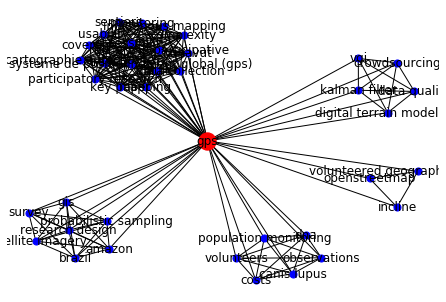

0.41989970207214355


In [5]:
start = time.time()            
getkwgraph("gps")
end = time.time()
print(end - start)
